# Example script

This simple Jupyter Notebook will exemplify a simple workflow using this library, starting from data fusion and ending with prediction.

## Step zero: install the library (and get the example data)
Let's install the package from `PyPI`.

In [1]:
%pip install chemfusekit

# Optional: download the example data from the repository (you could upload your own files)
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/qepas.xlsx
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/rt.xlsx

# Automatically inline the graphs
%matplotlib inline

/Users/federicoaguzzi/Desktop/progetto/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.
--2024-06-13 16:58:00--  https://github.com/f-aguzzi/tesi/raw/main/tests/qepas.xlsx
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/f-aguzzi/tesi/main/tests/qepas.xlsx [following]
--2024-06-13 16:58:00--  https://raw.githubusercontent.com/f-aguzzi/tesi/main/tests/qepas.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 590311 (576K) [application/octet-stream]
Saving to: ‘qepas.xlsx.1’

qepas.xlsx.1        100%[===================>] 576.48K  --.-KB/s    

## First step: Low-Level Data Fusion
- the `DF` class is used for data fusion
- the `DFSettings` class is a helper class for setting up `DF`
- `DF` data can then be exported, or used for further processing

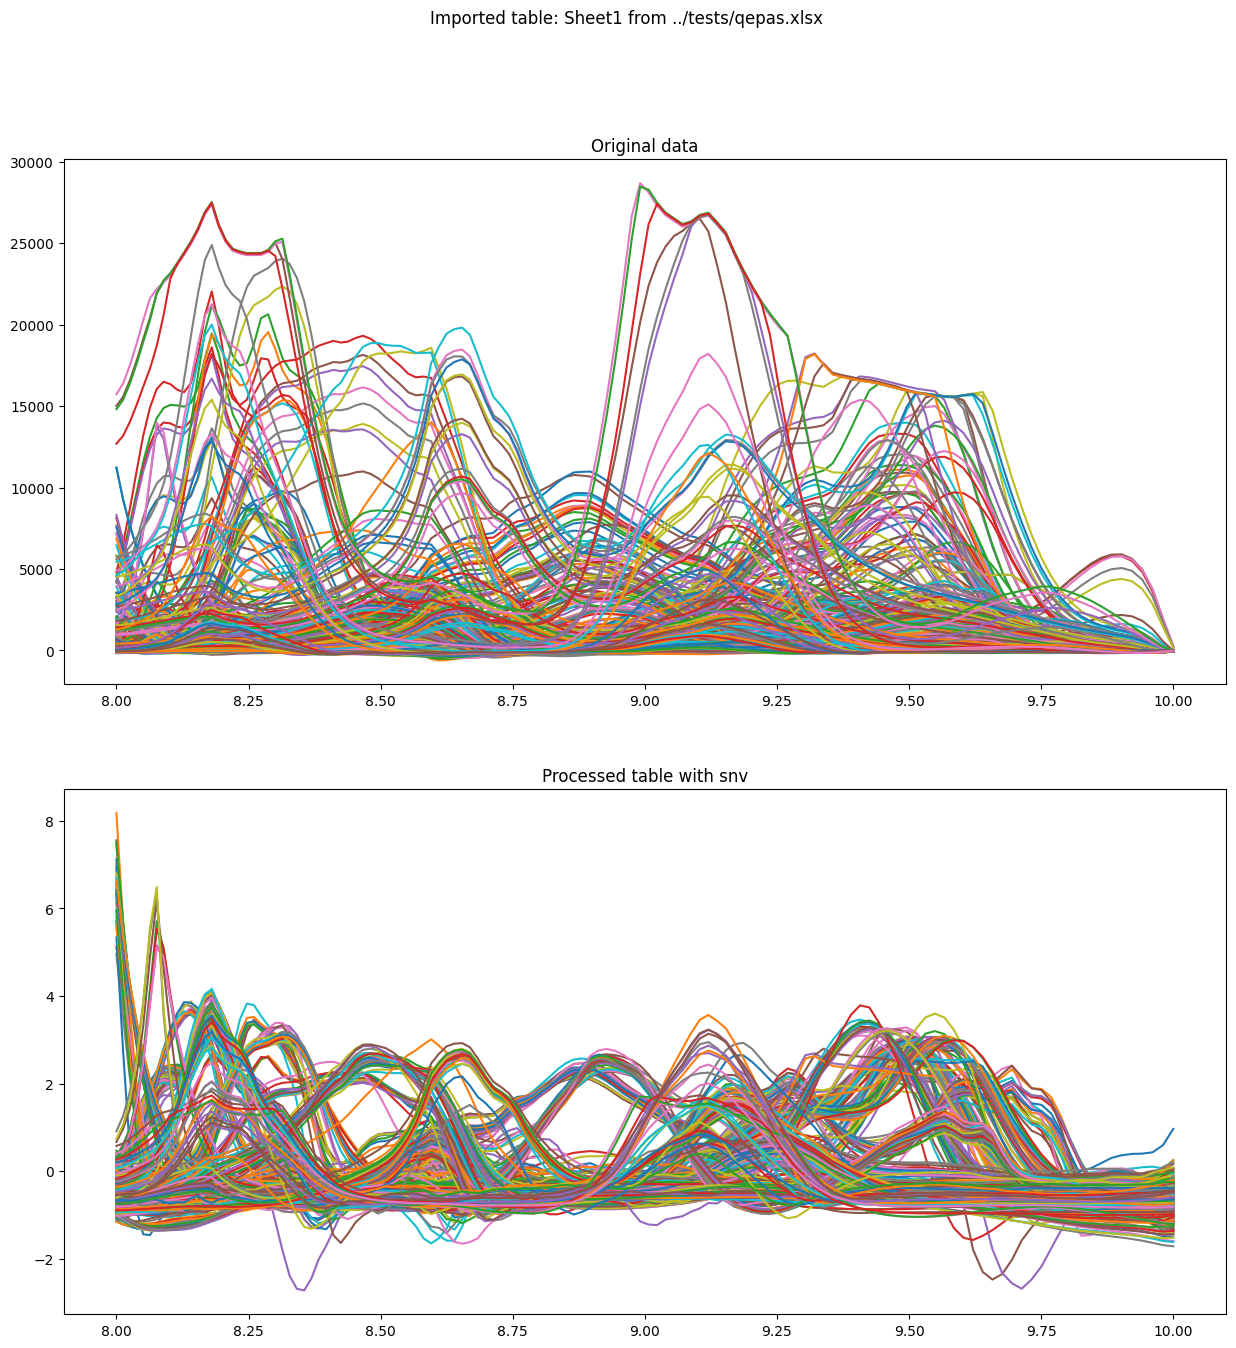

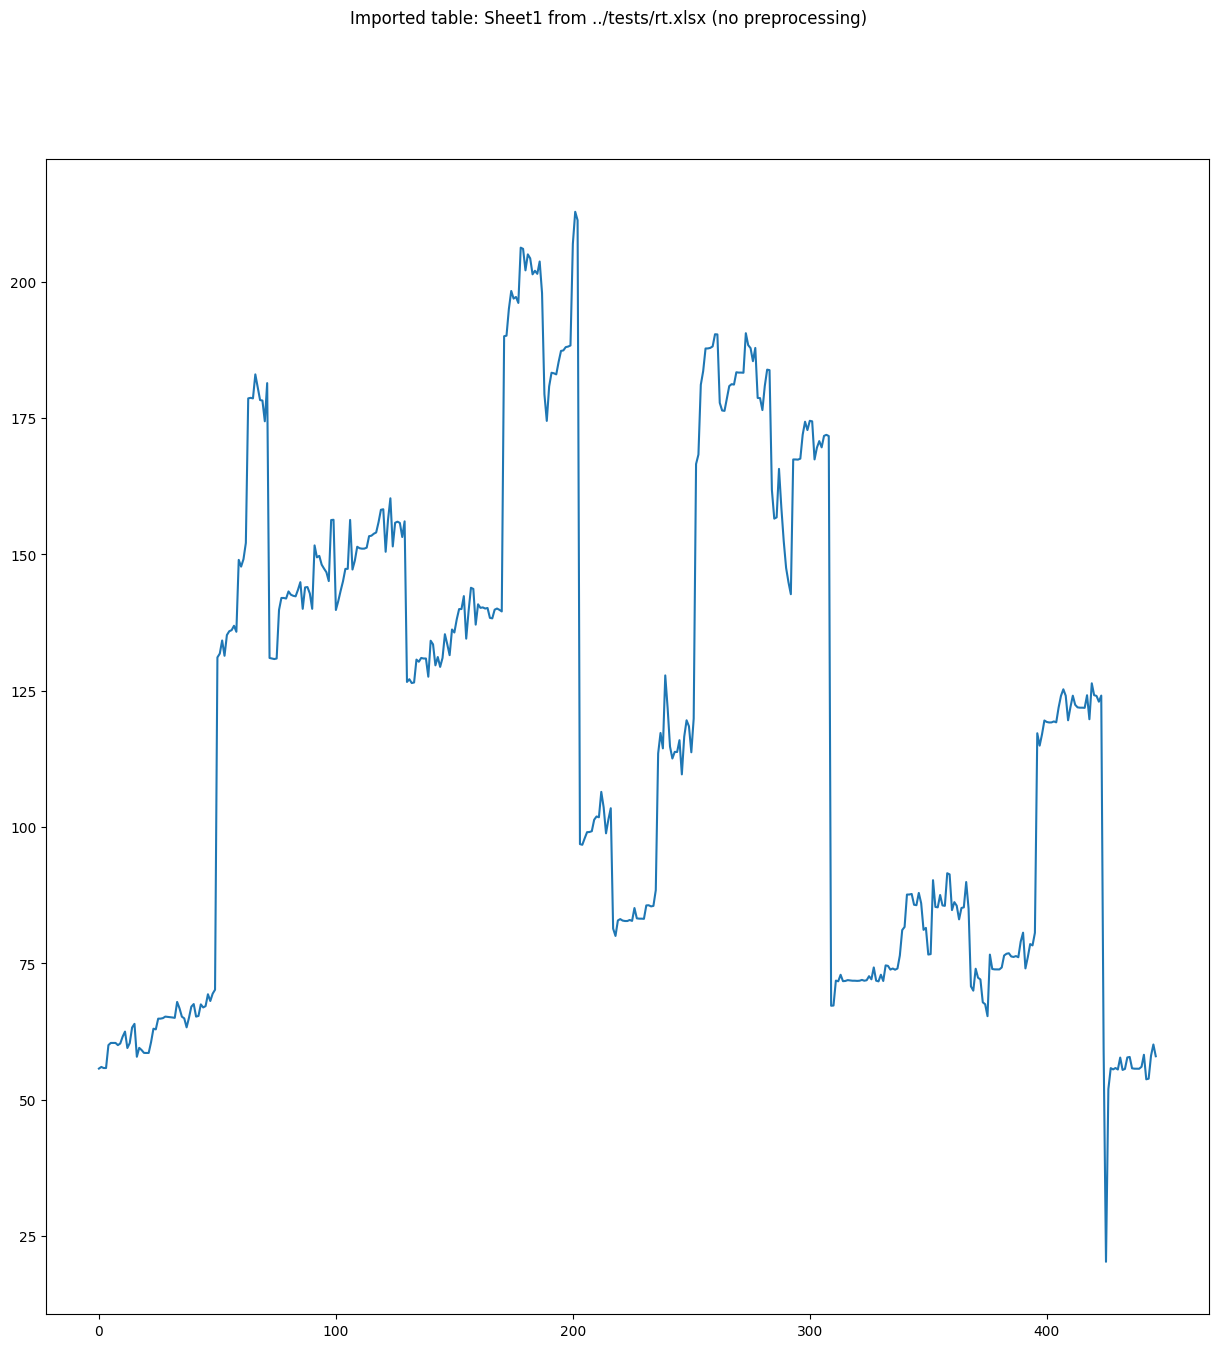

In [1]:
from chemfusekit.df import DFSettings, DF, Table

# Initialize the settings for low-level data fusion
# Perform preliminary data fusion
df_settings = DFSettings(output='graphical')
qepas_table = Table(
    file_path="qepas.xlsx",
    sheet_name="Sheet1",
    preprocessing="snv"
)
rt_table = Table(
    file_path="rt.xlsx",
    sheet_name="Sheet1",
    preprocessing="none"
)

tables = [qepas_table, rt_table]

# Initialize and run low-level data fusion
df = DF(df_settings, tables)
df.fuse()

In [ ]:
# (optional) export the LLDF data to an Excel file
df.export_data('output_file.xlsx')

## Second step: PCA

The `PCA` class provides Principal Component Analysis tools. Given:
- a target variance level to maintain even in the reduced component model;
- a confidence level for statistical tests;
- a number of initial components for the analysis
through the `PCASettings` class, the `PCA` class will perform an automated PCA analysis.

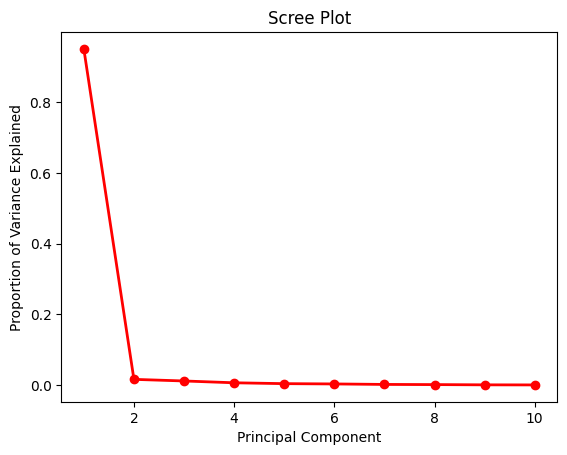

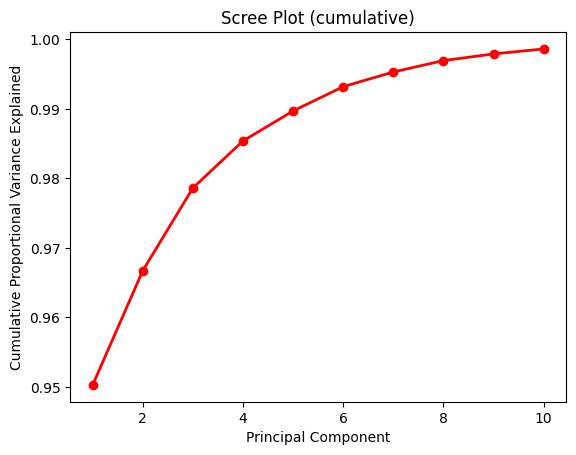


Number of components: 5



In [4]:
from chemfusekit.pca import PCASettings, PCA

# Initialize the settings for Principal Component Analysis
pca_settings = PCASettings(
    target_variance=0.99,
    confidence_level=0.05,
    initial_components=10,
    output='graphical' # graphs will be printed as pictures
)

# Initialize and run the PCA class
pca = PCA(pca_settings, df.fused_data)
pca.train()

# Print the number of components and the statistics
print(f"\nNumber of components: {pca.components}\n")
pca.pca_stats()

# Export data from PCA
pca_data = pca.export_data()

## Third step: LDA training

- the `LDA` class provides Linear Discriminant Analysis tools
- the `LDASettings` helper class holds the settings for the `LDA` class

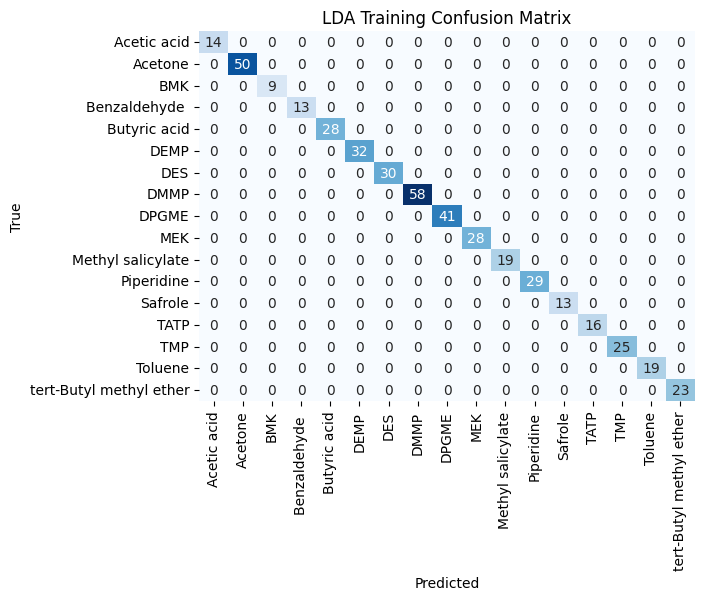

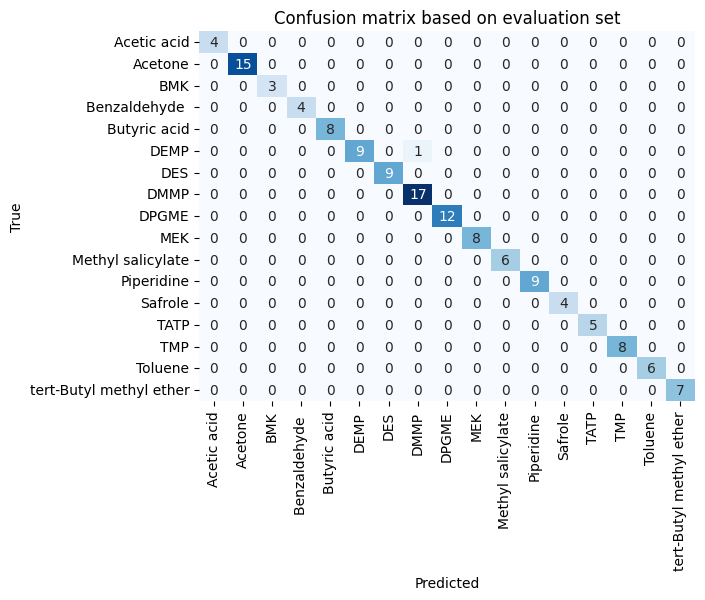

In [6]:
from chemfusekit.lda import LDASettings, LDA

settings = LDASettings(
    output='graphical',   # Graphs will be printed
    test_split=True     # Run split test
)

# Initialize and run the LDA class
lda = LDA(settings, pca_data)   # components will be determined automatically from the PCA data
lda.train()

## Fourth step: LDA prediction

We can pick a single line sample from `BaseDataModel` instances and all of its derived classes, including the `LLDFDataModel` used by `LLDF`, using the subscript ("[ ]") operator. In this case, we will pick line 119 from the dataset (a DMMP sample), feed it to the `predict()` method of our `LDA` classifier, and see if it gets recognized correctly.

In [7]:
# Let's pick a random sample and see if it gets recognized correctly:
x_data_sample = df.fused_data[119] # should be DMMP

# Let's run the prediction:
predictions = lda.predict(x_data_sample)
print(predictions)

['DMMP']
